In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
data = pd.read_csv("housing.csv")

In [236]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [238]:
data.dropna(inplace = True)

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [240]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'],axis = 1)
y = data['median_house_value']

In [241]:
x_train , x_test , y_train , y_test  = train_test_split(x, y , test_size = 0.2)

In [242]:
train_data = x_train.join(y_train)

In [243]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9683,-118.99,37.63,10.0,7744.0,1573.0,483.0,224.0,3.2917,INLAND,231800.0
18708,-122.41,40.58,35.0,2072.0,385.0,1029.0,375.0,2.8512,INLAND,75600.0
13511,-117.32,34.11,38.0,1462.0,337.0,1208.0,324.0,2.2604,INLAND,68100.0
18007,-121.96,37.29,24.0,1240.0,263.0,690.0,276.0,5.0000,<1H OCEAN,283000.0
15273,-117.28,33.06,8.0,4172.0,1022.0,2585.0,941.0,4.0118,NEAR OCEAN,245800.0
...,...,...,...,...,...,...,...,...,...,...
20278,-119.20,34.19,19.0,9503.0,1769.0,6370.0,1718.0,5.0016,NEAR OCEAN,218500.0
13710,-117.19,34.10,5.0,2167.0,384.0,1174.0,358.0,4.0114,INLAND,97700.0
16673,-120.81,35.19,14.0,3414.0,802.0,1236.0,632.0,3.7635,NEAR OCEAN,336200.0
11724,-120.04,39.24,30.0,2369.0,469.0,510.0,213.0,2.6500,INLAND,123800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

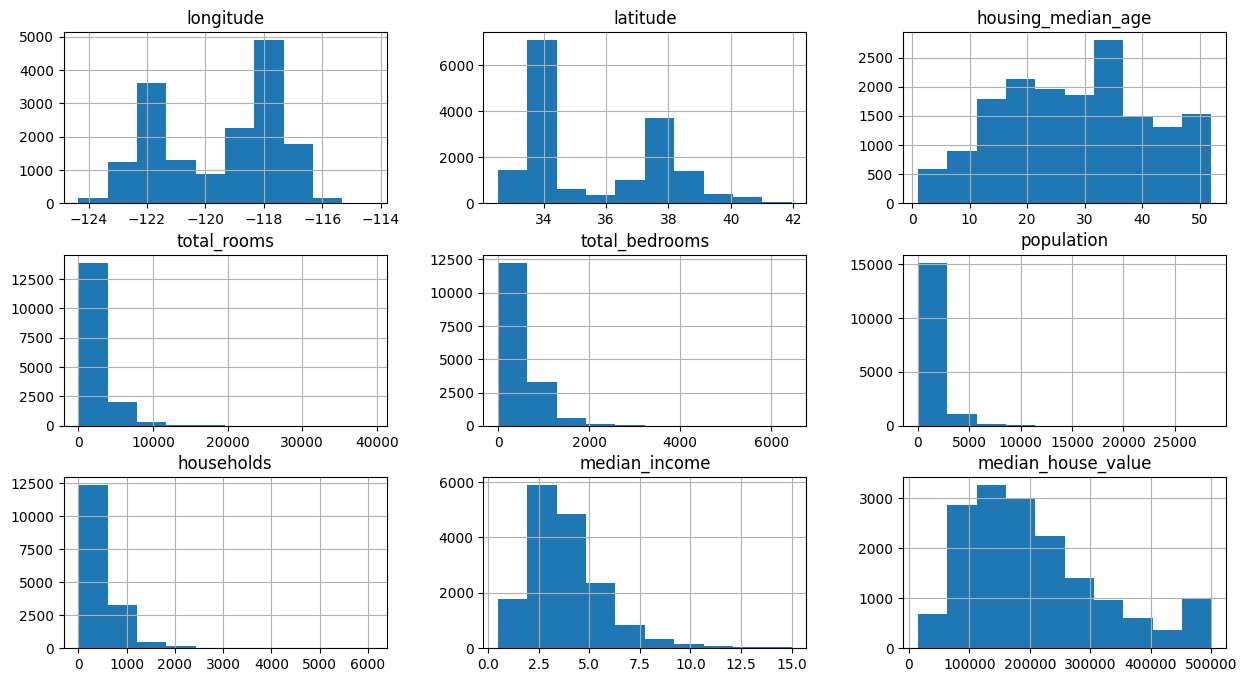

In [244]:
train_data.hist(figsize = (15,8))

<Axes: >

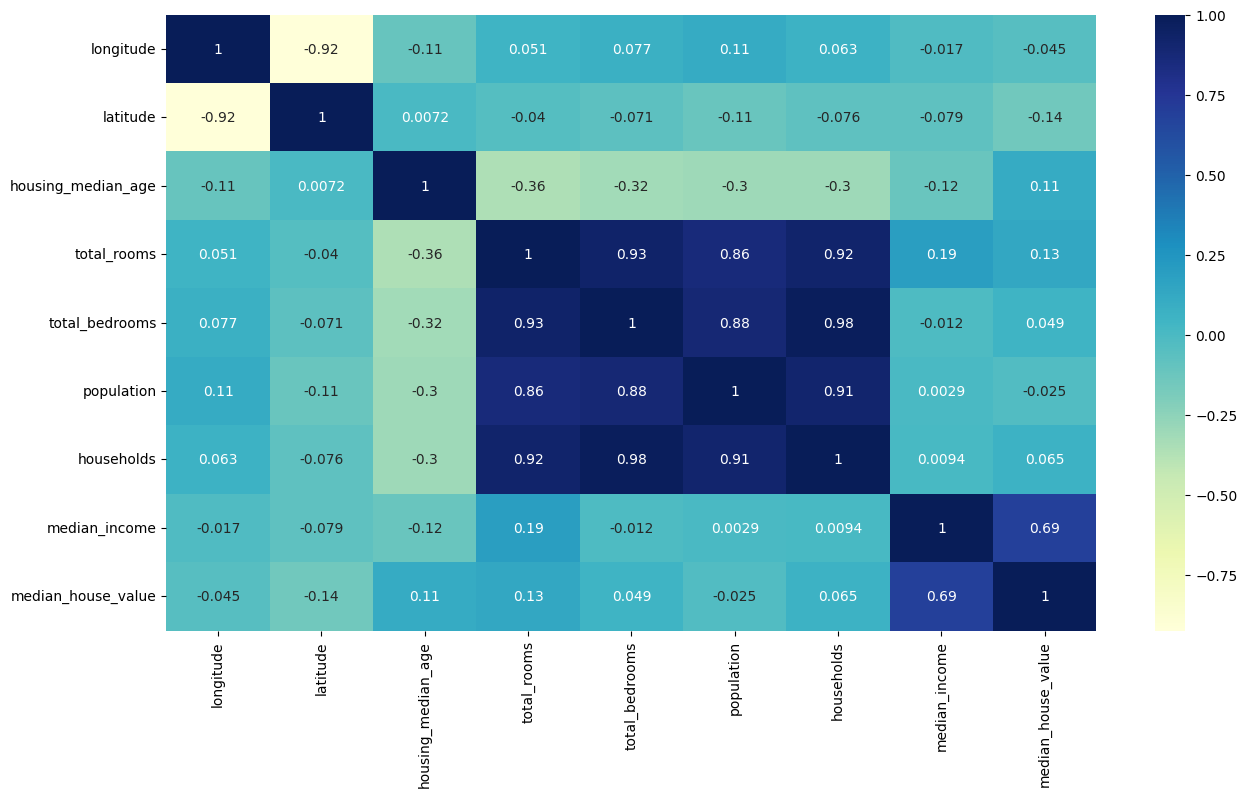

In [245]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True , cmap ='YlGnBu')

In [246]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1 )
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1 )
train_data['population'] = np.log(train_data['population'] + 1 )
train_data['households'] = np.log(train_data['households'] + 1 )

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

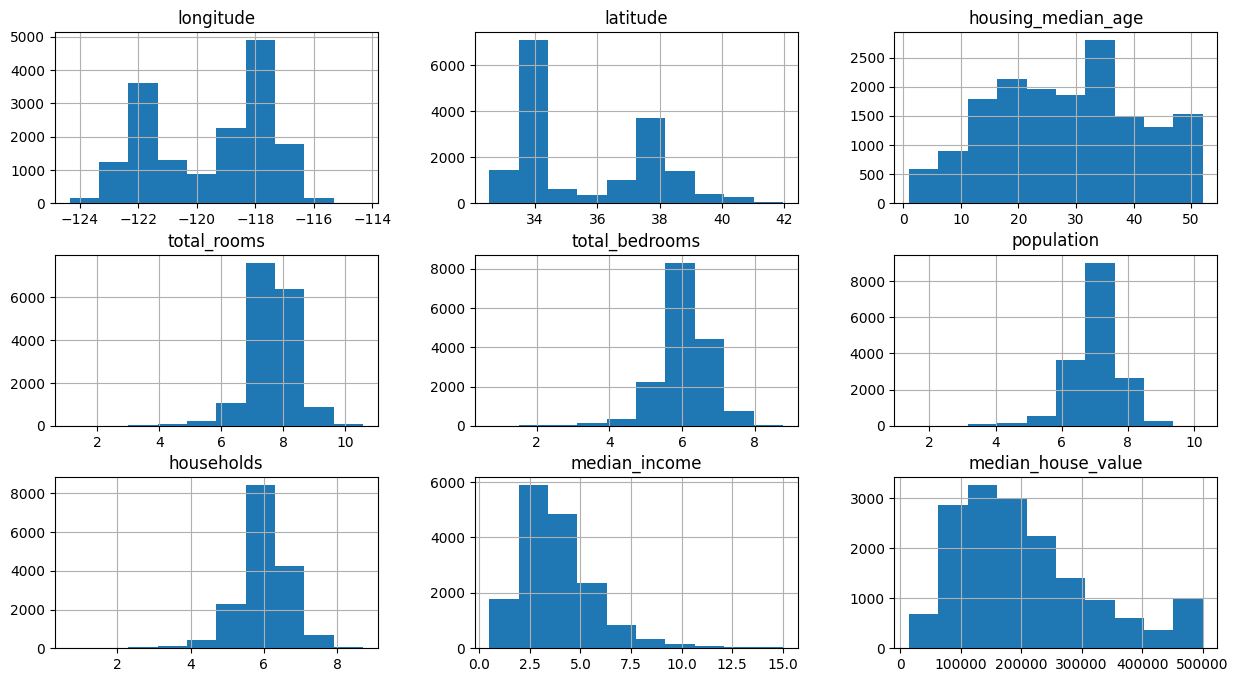

In [247]:
train_data.hist(figsize = (15,8))

In [248]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [249]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9683,-118.99,37.63,10.0,8.954803,7.361375,6.182085,5.416100,3.2917,231800.0,False,True,False,False,False
18708,-122.41,40.58,35.0,7.636752,5.955837,6.937314,5.929589,2.8512,75600.0,False,True,False,False,False
13511,-117.32,34.11,38.0,7.288244,5.823046,7.097549,5.783825,2.2604,68100.0,False,True,False,False,False
18007,-121.96,37.29,24.0,7.123673,5.575949,6.538140,5.624018,5.0000,283000.0,True,False,False,False,False
15273,-117.28,33.06,8.0,8.336390,6.930495,7.857868,6.848005,4.0118,245800.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20278,-119.20,34.19,19.0,9.159468,7.478735,8.759512,7.449498,5.0016,218500.0,False,False,False,False,True
13710,-117.19,34.10,5.0,7.681560,5.953243,7.069023,5.883322,4.0114,97700.0,False,True,False,False,False
16673,-120.81,35.19,14.0,8.135933,6.688355,7.120444,6.450470,3.7635,336200.0,False,False,False,False,True
11724,-120.04,39.24,30.0,7.770645,6.152733,6.236370,5.365976,2.6500,123800.0,False,True,False,False,False


<Axes: xlabel='latitude', ylabel='longitude'>

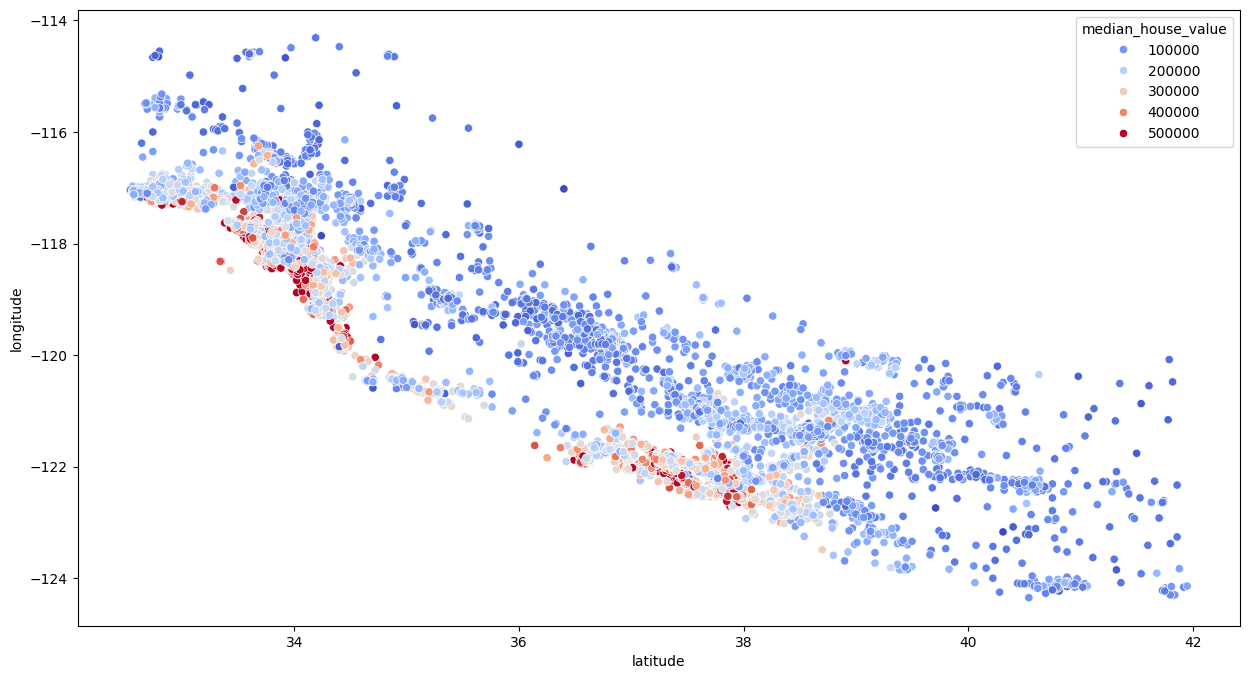

In [250]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="latitude", y = "longitude" ,data=train_data, hue = "median_house_value" , palette ="coolwarm")

In [251]:
train_data['bedrom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train , y_train = train_data.drop(['median_house_value'] , axis=1),train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [253]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1 )
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1 )
test_data['population'] = np.log(test_data['population'] + 1 )
test_data['households'] = np.log(test_data['households'] + 1 )

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedrom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [234]:
x_test , y_test = test_data.drop(['median_house_value'] , axis=1),test_data['median_house_value']

In [255]:
x_test_s = scaler.transform(x_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ocean_proximity
Feature names seen at fit time, yet now missing:
- <1H OCEAN
- INLAND
- ISLAND
- NEAR BAY
- NEAR OCEAN
- ...


In [256]:
reg.score(x_test_s,y_test)

C:\Users\pasup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-358.4390288750944

In [258]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [259]:
forest.score(x_test_s,y_test)

-0.44445732477793176

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[30,50,100],
    "max_features":[8,12,20],
    "min_samples_split":[2,4,6,8]
}

grid_search = GridSearchCV(forest,param_grid, cv = 5,
                           scoring ="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(x_train_s,y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_s,y_test)